In [25]:
import numpy as np
import matplotlib.pyplot as plt
import json
import math

In [26]:
import operator as op
from functools import reduce

def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom  # or / in Python 2

def lower_bound(n,d):
    if n > 50:
        return d * np.log2(n/d)
    else:        
        return np.log2(sum([ncr(n,i) for i in range(0,d+1)]))

In [27]:
# Random measurments load results

result = {}
for n in [8, 16, 32, 64, 128, 256, 512]:
    n = 3*n //2
    result[n] = {}
    for degree in [2, 3, 4, 5]:
        result[n][degree] = {}
        my_range = np.linspace(0.4 *degree*np.log2(n), 6 * degree*np.log2(n), 50)
        m_list = [int(a) for a in my_range]
        for m in m_list:
            result[n][degree][m] = []
            for try_no in range(20):
                try:
                    f =open(f"results/n={n}_m={m}_d={degree}_{try_no}.json")
                    data = json.loads(f.read())
                    result[n][degree][m].append(data)
                except:
                    print(f"Couldn't find results/n={n}_m={m}_d={degree}_{try_no}.json")
                    print(f"Assume job failed")
                    data = {'status': False, 'time':60*60*4, 'n': n, 'm': m, 'd': degree}
                    result[n][degree][m].append(data)
                        

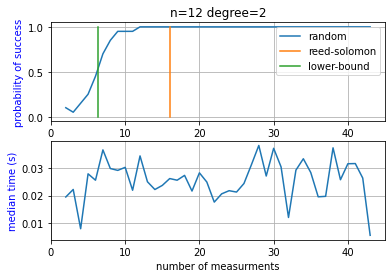

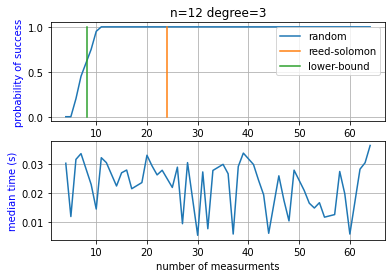

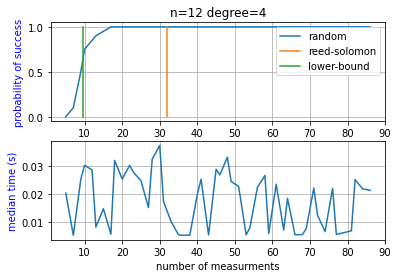

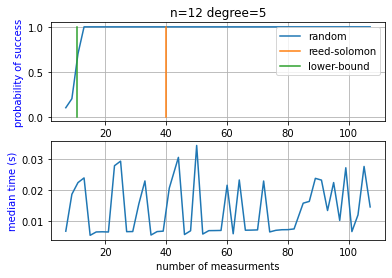

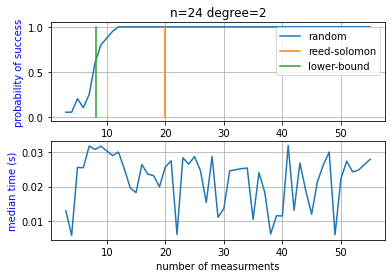

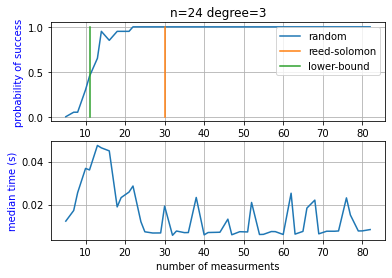

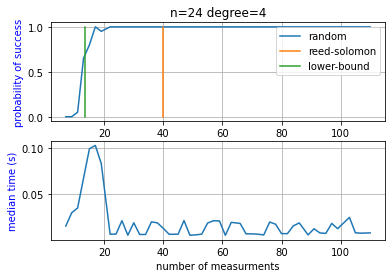

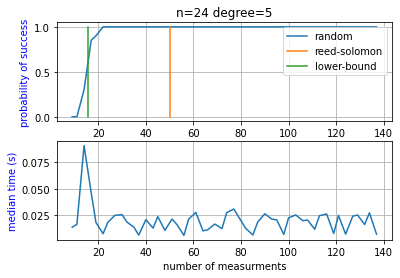

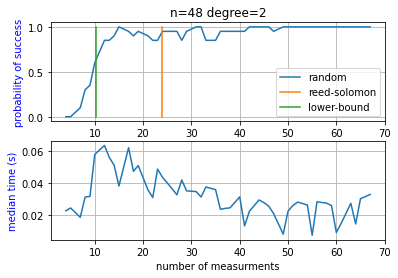

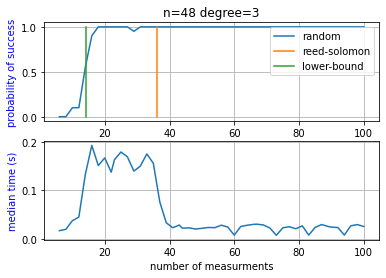

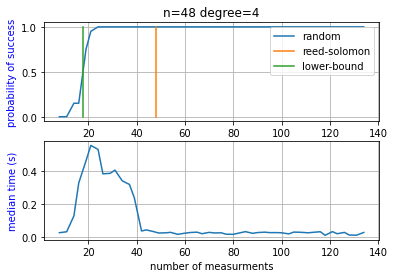

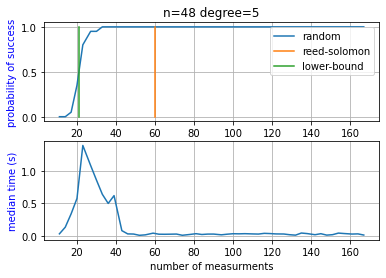

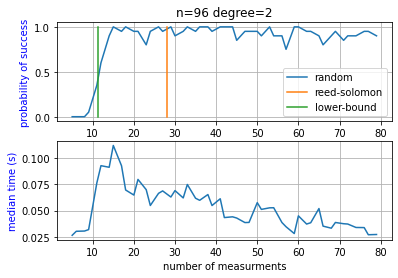

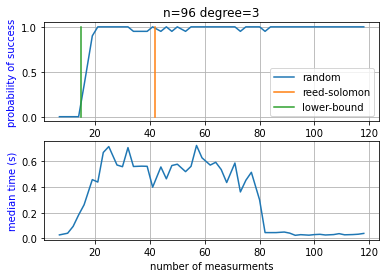

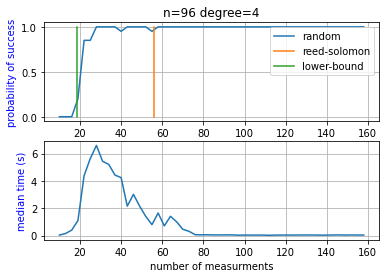

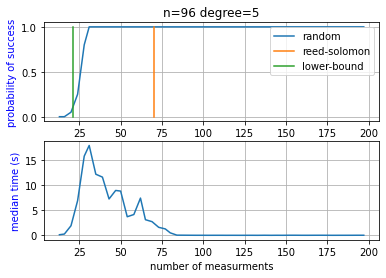

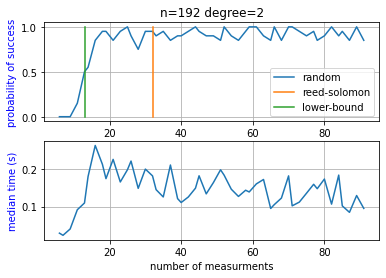

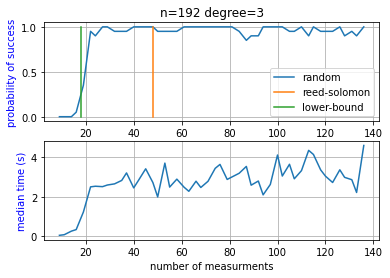

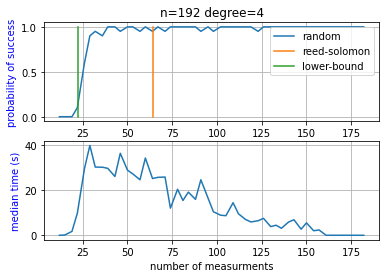

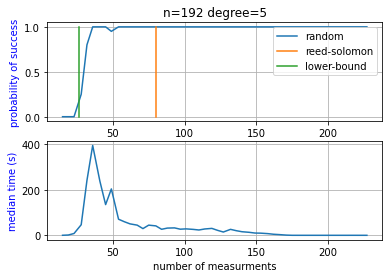

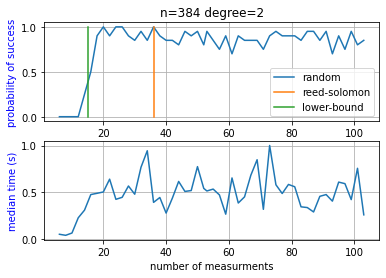

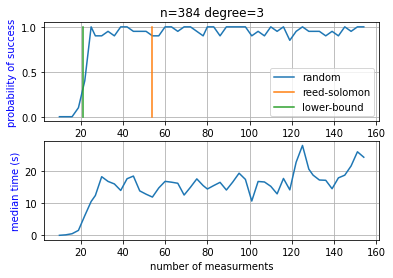

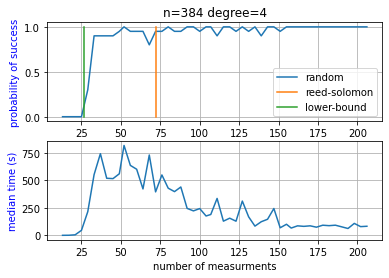

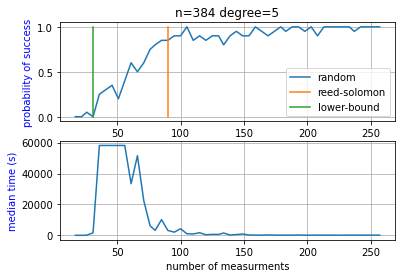

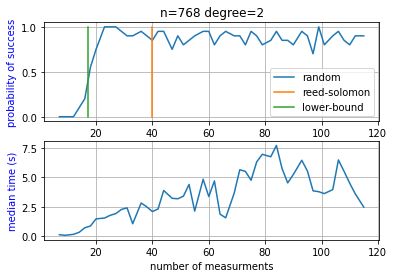

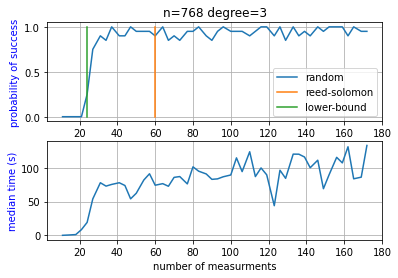

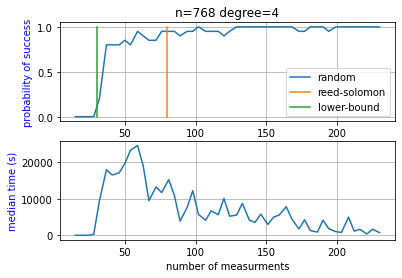

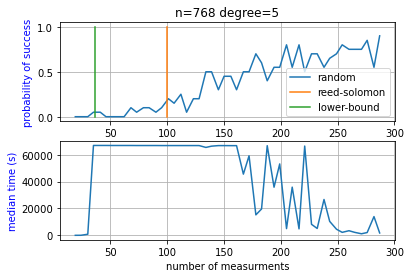

In [22]:
# Random measurements plot results
for n in result:
    for degree in result[n]:
        no_measurements , p_failure, time  = [], [], []
        for m in result[n][degree]:
            p = sum([1 for j in range(20) if result[n][degree][m][j]["status"]==True])/20
            no_measurements.append(m)
            p_failure.append(p)
            time.append(np.median([result[n][degree][m][j]["time"] for j in range(20)]))
            
        # print(p_failure, time)
        fig, (ax1, ax2) = plt.subplots(2, 1)
        ax1.set_ylabel("probability of success", color="blue")
        ax1.set_xlabel("number of measurments")
        my_len = len(no_measurements)
        ax1.plot(no_measurements, p_failure, label="random")
        ax1.plot( [2*degree*math.ceil(np.log2(n))]*my_len, np.linspace(0,1,my_len), label="reed-solomon")
        ax1.plot( [lower_bound(n, degree)]*my_len, np.linspace(0,1,my_len), label = "lower-bound")
        ax1.xaxis.grid()
        ax1.yaxis.grid()
        ax1.set_title(f"n={n} degree={degree}")
        ax1.legend()
        ax2.set_ylabel("median time (s)", color="blue")
        ax2.set_xlabel("number of measurments")
        ax2.plot(no_measurements, time)
        ax2.xaxis.grid()
        ax2.yaxis.grid()
        plt.savefig(f"images/random/n={n}_d={degree}", dpi=300)
        plt.show()
        
           

In [23]:
# Binning and reed-solomon load the results
from math import ceil 
result_binning = {}
result_reedsolomon = {}
for n in [32, 64, 128, 256, 512, 1024, 2048, 4096]:
    n = 3*n // 2
    result_binning[n] = {}
    for degree in [2, 4, 6, 8, 10, 20]:
        result_binning[n][degree] = {}
        no_bins_range = np.linspace(0.2 * degree**2,  degree**2, 10)
        no_bins_range = [ceil(a) for a in no_bins_range]
        for no_bins in no_bins_range:
            for no_iterations in [1,2,3]:
                for ratio in [1.1, 1.3, 1.5, 1.9, 2.1, 3.0]:
                    for try_no in range(10):
                        with open(f"results2/n={n}_nobins={no_bins}_no_iter={no_iterations}_ratio={ratio}_d={degree}_{try_no}.json") as f:
                            try:
                                data = json.loads(f.read())
                                m = data["measurements"]
                                try:
                                    result_binning[n][degree][m].append(data)
                                except:
                                    result_binning[n][degree][m] = [data]
                            except:
                                print(f"couldn't find results2/n={n}_nobins={no_bins}_no_iter={no_iterations}_ratio={ratio}_d={degree}_{try_no}.json")
       
            
for n in [32, 64, 128, 256, 512, 1024, 2048, 4096]:
    n = 3*n//2
    result_reedsolomon[n] = {}
    for degree in [2, 4, 6, 8,10, 20]:
        with open(f"results3/n={n}_d={degree}.json") as f:
            data = json.loads(f.read())
            result_reedsolomon[n][degree] = {"measurements": data["measurements"], "times":data["times"]}

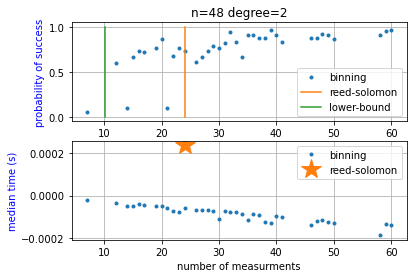

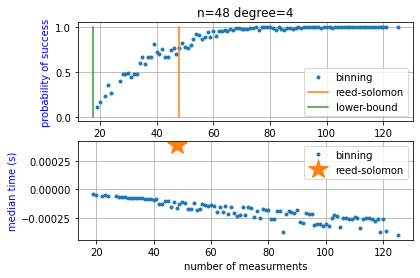

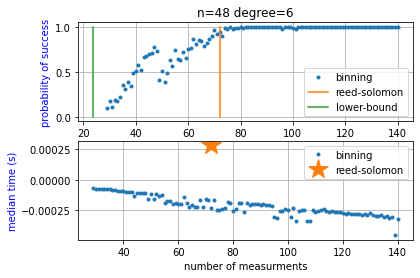

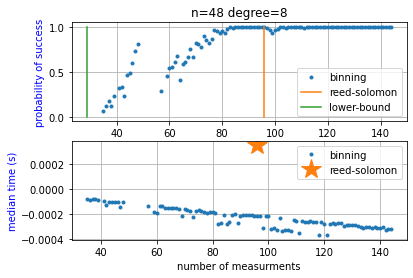

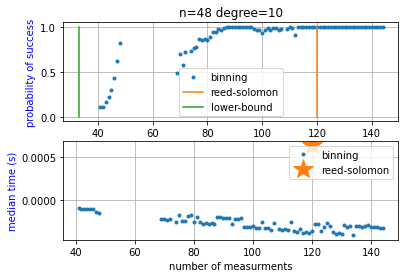

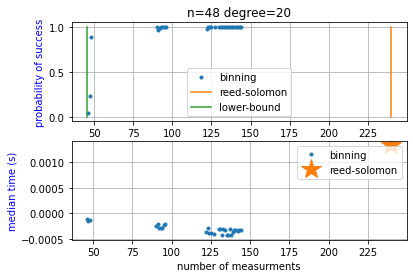

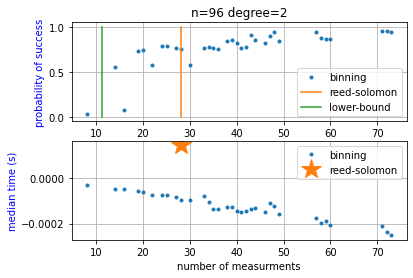

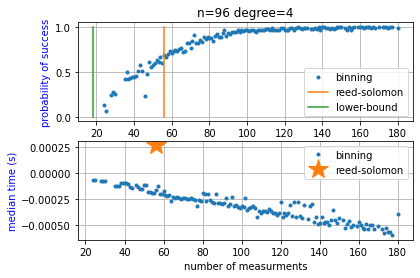

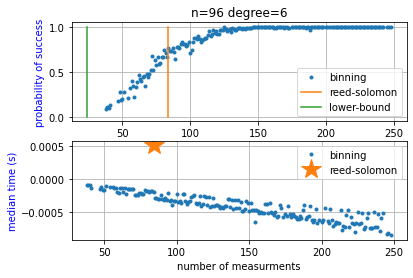

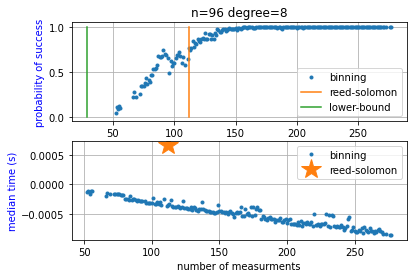

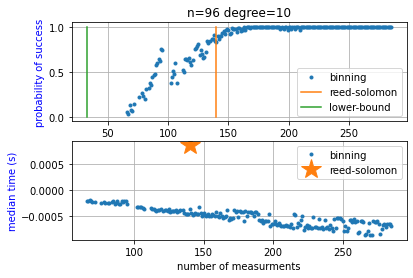

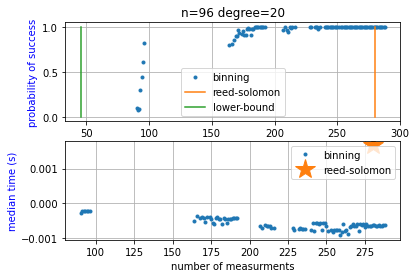

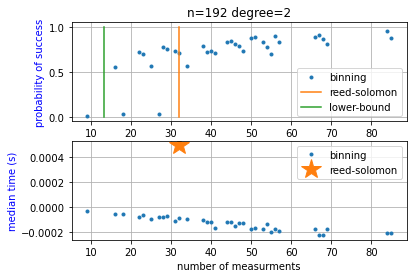

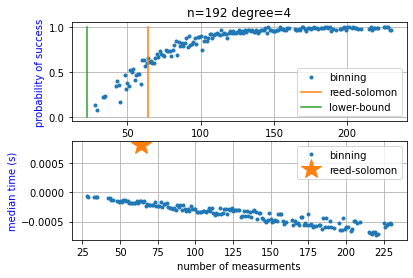

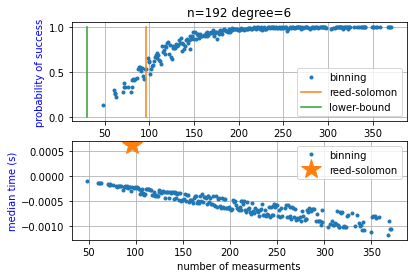

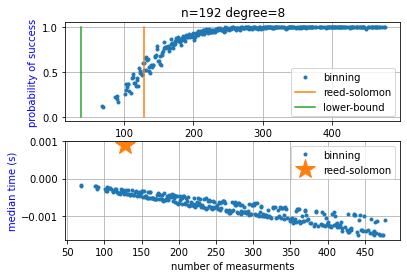

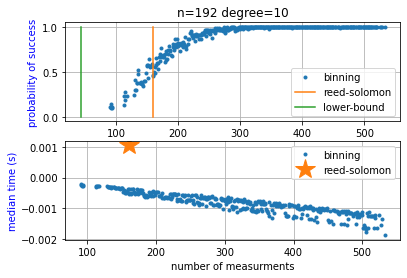

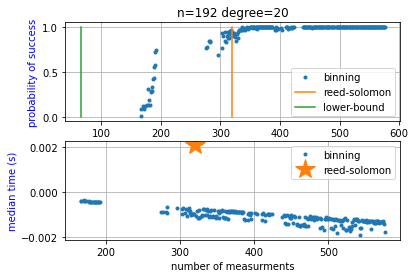

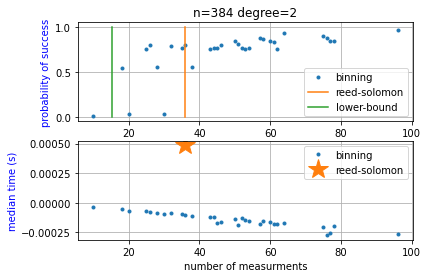

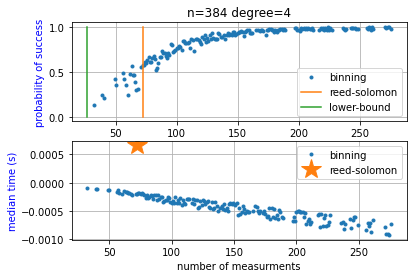

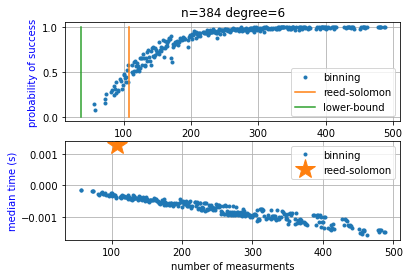

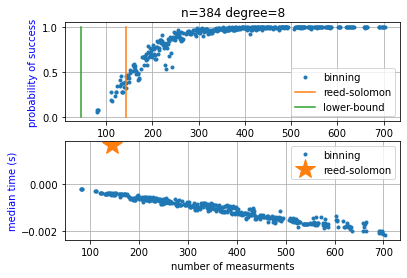

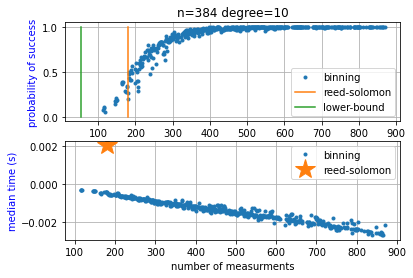

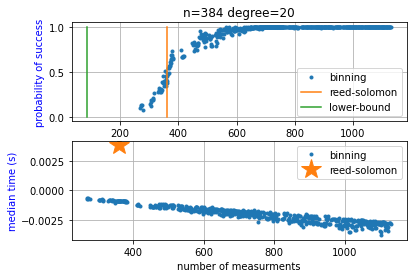

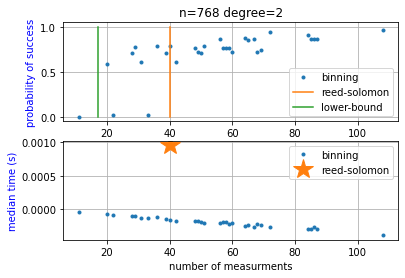

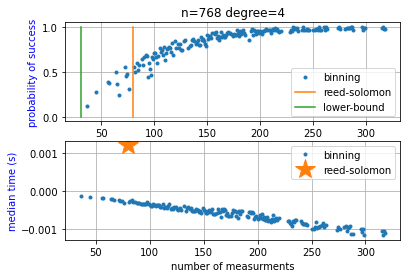

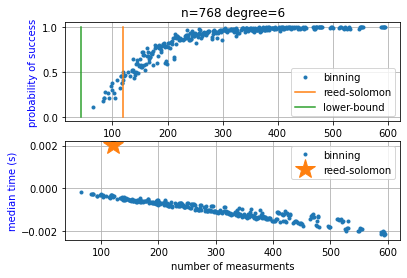

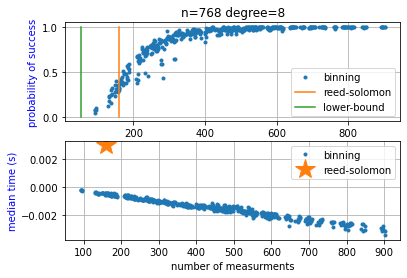

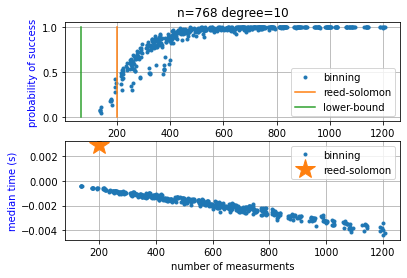

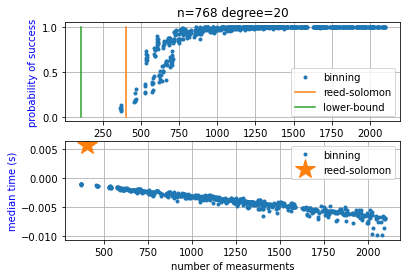

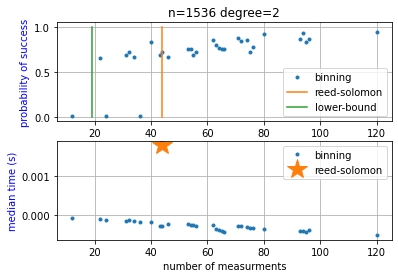

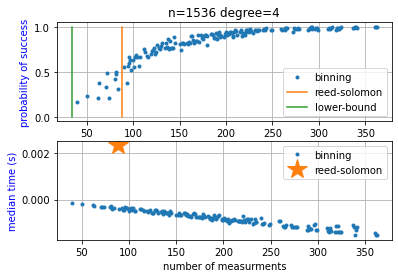

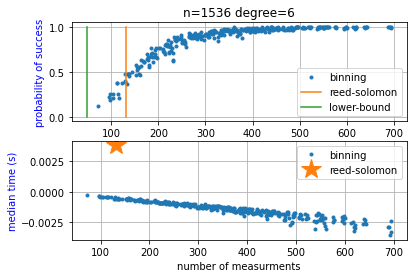

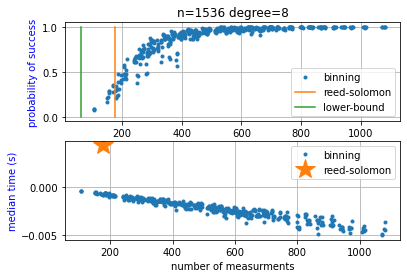

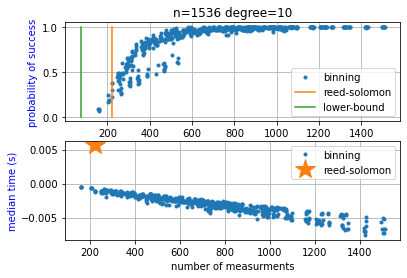

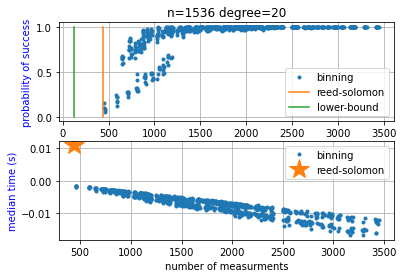

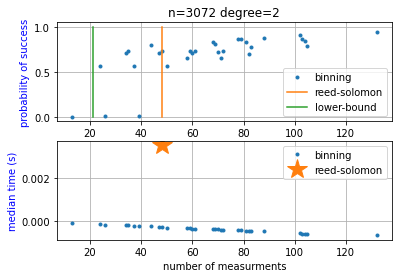

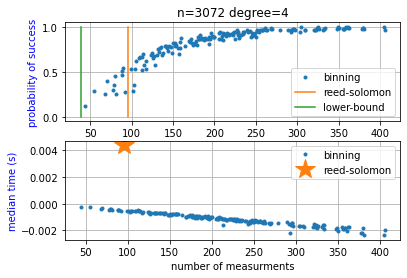

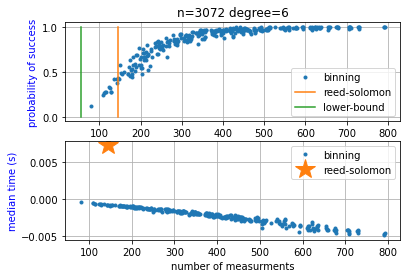

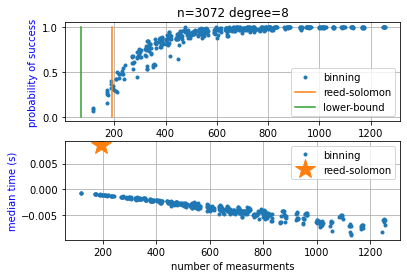

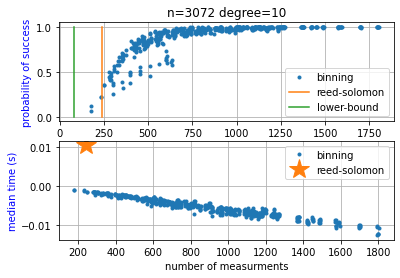

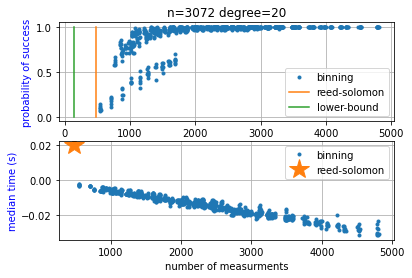

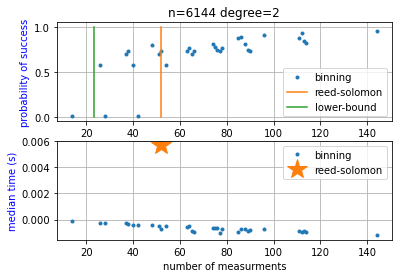

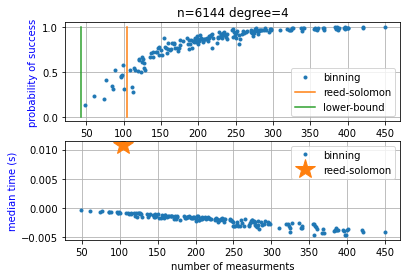

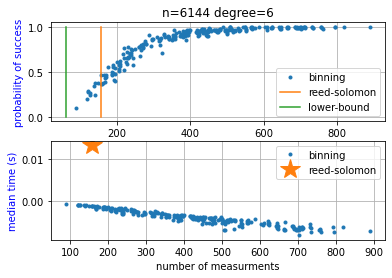

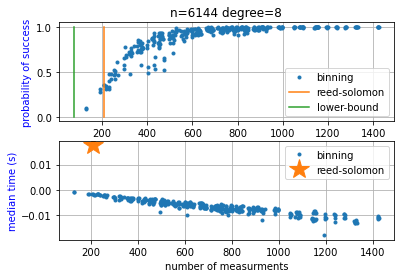

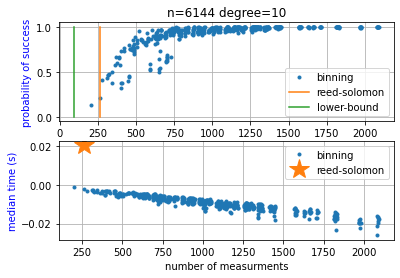

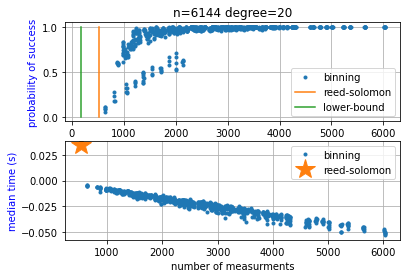

In [24]:
# Binning and reed-solomon plot the results
for n in result_binning:
    for degree in result_binning[n]:
        no_measurements , p_success, times  = [], [], []
        for m in result_binning[n][degree]:
            l = len(result_binning[n][degree][m])
            p, time = max([(result_binning[n][degree][m][index]["p_success"], -result_binning[n][degree][m][index]["time_median"])for index in range(l)])
            time = -time 
            #p = sum([1 for j in range(l) if result_binning[n][degree][m][j]["status"]==True])/l
            #if l>=8 and p==1:
            #    print(l,p,m)
            no_measurements.append(m)
            p_success.append(p)
            times.append(-time)
        
        fig, (ax1, ax2) = plt.subplots(2, 1)
        ax1.set_ylabel("probability of success", color="blue")
        ax1.set_xlabel("number of measurments")
        my_len = len(no_measurements)
        ax1.plot(no_measurements, p_success, ".", label="binning")
        ax1.plot([2*degree*math.ceil(np.log2(n+1))]*my_len, np.linspace(0,1,my_len), label="reed-solomon")
        ax1.plot( [lower_bound(n, degree)]*my_len, np.linspace(0,1,my_len), label = "lower-bound")
        ax1.xaxis.grid()
        ax1.yaxis.grid()
        ax1.set_title(f"n={n} degree={degree}")
        ax1.legend()
        
        ax2.set_ylabel("median time (s)", color="blue")
        ax2.set_xlabel("number of measurments")
        ax2.plot(no_measurements, times, ".", label="binning")
        ax2.plot(result_reedsolomon[n][degree]["measurements"], np.median(result_reedsolomon[n][degree]["times"]), "*", markersize=20, label="reed-solomon")
        ax2.xaxis.grid()
        ax2.yaxis.grid()
        ax2.legend()
        plt.savefig(f"images/binning/n={n}_d={degree}", dpi=300)
        
        plt.show()
           